# Oscar De la Cruz Echevetse

# Tarea 2: Mecánica Analítica

## 1. El péndulo forzado amortiguado

## Instrucciones:

La ecuación del péndulo forzado amortiguado es

    Aceleración+Amortiguamiento+Gravedad=Fuerza externa

Que como ecuación se ve:

\begin{equation}
\ddot \theta + \mu \dot\theta + sin(\theta) = Acos(\omega_d t)
\end{equation}

donde hemos normalizado el tiempo para que la frencuencia natural sea 1.

Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular tiene una función coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomandoc $A=1$ y $\mu=0.05$

## CODIGO

In [1]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

### Problemas a resolver:

a) Graficar la Amplitud como función de la frecuencia de la fuerza externa.

La solución particular vista en clase es:

\begin{equation}
\theta_p(t)=\frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + 4\omega_d^2\beta^2}} \cos(\omega_dt+\delta)
\end{equation}

Dedinimos:
\begin{equation}
Amplitud=\frac{1}{\sqrt{(1-\omega_d^2)^2 + \omega_d^2\mu^2}}
\end{equation}

La cual defino como función en la siguiente linea de codigo:

In [2]:
#definimos función para la amplitud
def amplitud (dat):
    omg=dat[0]
    mu=dat[1]
    omg0=dat[2]
    arg=pow(pow(pow(omg0,2)-pow(omg,2),2)+pow(omg*mu,2),0.5)
    return np.divide(1,arg)

Donde, en este caso: $\mu=2\beta=0.05$, $\omega_0=1$ y $A=1$. Así calculamos la amplitud en las siguientes líneas de codigo:

In [156]:
omg_0 = 1
mu = 0.05

ffe = np.linspace(omg_0 - 1, omg_0 + 2, 10000) #ffe= frecuencia de la fuerza externa.
dats = np.array([ffe , mu , omg_0])
amp = amplitud(dats)

La gráfica de la Amplitud como función de la frecuencia de la fuerza externa se verá como:

<Figure size 432x288 with 0 Axes>

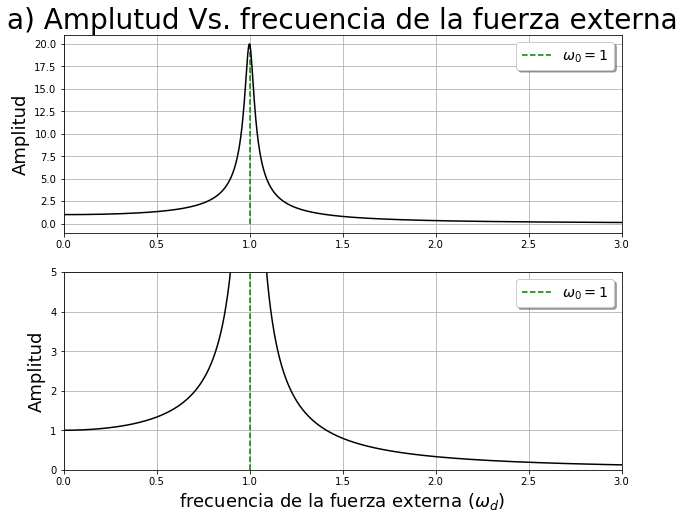

In [157]:
plt.figure(2)
plt.figure(figsize=(10,8))
plt.xlim(np.amin(ffe),np.amax(ffe))

plt.subplot(2, 1, 1)
plt.title('a) Amplutud Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.ylabel("Amplitud",fontsize=18)
plt.xlim(np.amin(ffe),np.amax(ffe))
plt.plot(omg_0*np.ones(int(np.amax(amp))),np.linspace(0.0, int(np.amax(amp)),int( np.amax(amp))) , 'g--',label='$\omega_0={0}$'.format(omg_0))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.plot(ffe,amp, color='k')
plt.grid()

plt.subplot(2, 1, 2)
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Amplitud",fontsize=18)
plt.xlim(np.amin(ffe),np.amax(ffe))
plt.ylim(0,np.amax(amp)/4)
plt.plot(omg_0*np.ones(int(np.amax(amp))),np.linspace(0.0, int(np.amax(amp)),int( np.amax(amp))) , 'g--',label='$\omega_0={0}$'.format(omg_0))
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.plot(ffe,amp, color='k')
plt.grid()

Donde vemos que el máximo de la amplitud esta en la frecuencia de fuerza extrema que es igual $\omega_0$

b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

La fase la podemos calcular con la siuiente expereción:

\begin{equation}
\delta =\tan^{-1} \left[ \frac{\mu\omega_d}{\omega_0^2 -\omega_d^2} \right]
\end{equation}

En la siguiente linea de codigo se define la exprecion anterior con una función:

In [148]:
def fase (dat):
    omg=dat[0]
    mu=dat[1]
    omg0=dat[2]
    arg=np.divide(mu*omg,pow(omg0,2)-pow(omg,2))
    return np.arctan(arg)

Entonces, calculamos la fase en función de la frecuemcia de fuerza externa "$ffe$":

In [149]:
ffe2=np.linspace(-omg_0, omg_0, 10000) 
dats2=np.array([ffe2,mu,omg_0]) 
fse=fase(dats2)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Y graficamos la funcón:

<Figure size 432x288 with 0 Axes>

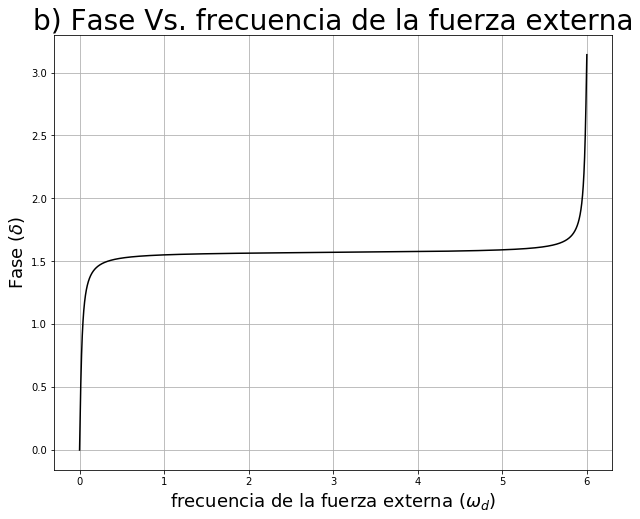

In [150]:
plt.figure(2)
plt.figure(figsize=(10,8))
plt.title('b) Fase Vs. frecuencia de la fuerza externa',fontsize = 28, color = '0', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.xlabel("frecuencia de la fuerza externa $(\omega_d)$",fontsize=18)
plt.ylabel("Fase $(\delta)$",fontsize=18)
plt.plot(ffe2 + np.amax(ffe2),fse + np.max(fse), color='k')
plt.grid()
plt.show()

c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.

Usando la solución:
\begin{equation}
\theta_p(t)=\frac{A}{\sqrt{(\omega_0^2-\omega_d^2)^2 + 4\omega_d^2\beta^2}} \cos(\omega_dt+\delta)
\end{equation}

y las condciones iniciales:
\begin{equation}
\theta_p(t=0)=\pi/10 \quad y \quad \dot\theta_p(t=0)=0
\end{equation}
\begin{equation}
\theta_p(t=0)=10 = \pi/18 \quad y \quad \dot\theta_p(t=0)=0
\end{equation}

Podemos encontrar $\omega_p$ y $\delta$ con las condicones iniciales anteriores con:

\begin{equation}
\delta = \arccos \left[ \alpha \sqrt{(\omega_0^2 - \omega_d^2)^2 + \omega_d^2\mu^2} \right]
\end{equation}

Donde: $\alpha$ es la condición del áungulo inicial:   $\theta = \alpha$

\begin{equation}
\omega_d^2 = \frac{(2\omega_0^2 -\mu^2) + \sqrt{(\mu-2\omega_0^2)^2 - 4(\omega_0^4 - \frac{1}{\alpha})}}{2}
\end{equation}

Donde:
\begin{equation}
\alpha<\frac{4}{\mu^2(4\omega_0^2 - 1)}
\end{equation}

En este caso donde $\omega_0=1$ y $\mu=0.05$, $\alpha < 26.6 $

In [ ]:
Definimos una función para calcular la 

In [151]:
def omg_d(omg0,mu,ci):
    arg_1 =pow(pow(mu**2 - 2.0*omg0**2 , 2) - 4*(omg0**4-np.pi/ci) , 0.5)
    arg_2=((2*omg0**2-mu**2) + arg_1)/2
    return pow(arg_2 , 0.5)

In [152]:
def sol_theta(datos,t):
    omg_d,omg0,mu, ci = datos
    arg_1 = pow( pow(pow(omg0,2)-pow(omg_d,2),2)+pow(omg_d*mu,2) ,0.5)
    delta = np.arccos(ci*arg_1)
    ampl = 1/arg_1
    return ampl*np.cos((omg_d*t)+delta)

In [153]:
def sol_theta_p(datos,t):
    omg_d,omg0,mu,ci = datos
    arg_1 = pow( pow(pow(omg0,2)-pow(omg_d,2),2)+pow(omg_d*mu,2) ,0.5)
    delta = np.arccos(ci*arg_1)
    ampl = 1/arg_1
    return -ampl*omg_d*np.sin((omg_d*t)+delta)

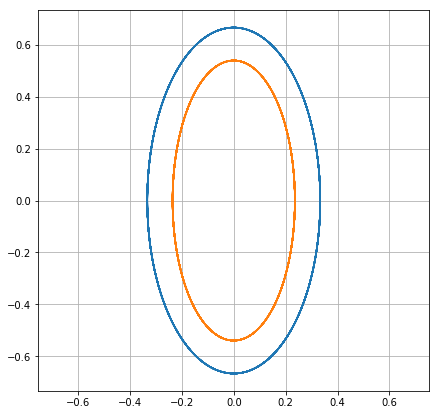

In [161]:
t=np.linspace(0, 30, 10000)
thta_t01=np.pi/9
dat=np.array([omg_d(omg_0,mu,thta_t01),omg_0,mu,thta_t0])
tha_1 = sol_theta(dat,t)
tha_p_1 = sol_theta_p(dat,t)

thta_t02=np.pi/18
dat=np.array([omg_d(omg_0,mu,thta_t02),omg_0,mu,thta_t0])
tha_2 = sol_theta(dat,t)
tha_p_2 = sol_theta_p(dat,t)

plt.figure(figsize=(7,7))
plt.axis('equal')
plt.plot(tha_1,tha_p_1)
plt.plot(tha_2,tha_p_2)
plt.grid()
plt.show()

d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.

e) Graficar en el espacio fase 2 trayectorias con 2 A's distintas, $\mu=0.05$ y la misma confición inicial.

f) Graficar en el espacio fase 2 trayectorias con $2\mu's$ distintas, $A=1$ y la misma confición inicial.

## 2. Ecuación no lineal no forzada sin amortiguamiento.

La ecuación tiene la forma:

\begin{equation}
\ddot \theta + \omega_0^2 sin(\theta) = 0
\end{equation}

a) Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

Usando:

\begin{equation}
\omega = \dot\theta
\end{equation}
\begin{equation}
\Rightarrow \dot\omega = - \omega_0^2 sin(\theta)
\end{equation}

Donde, $\omega$ es la velocida angular.


In [141]:
def fun (y, t, b, omg_0):
    theta, omega = y
    return [omega, -b*omega - omg_0**2*np.sin(theta)]

Frecuencia natural unitaria: $\omega_0 = 1$.

Para un ángulo inicial de 70 grados $\theta(t=0)=70$ y velocidad angular $\omega(t=0)=0$ ya que parte del reposo

In [115]:
grdo_i=70
omg_rep=0
y0 = [(grdo_i*np.pi/180) - 0.1  , omg_rep]

In [113]:
t = np.linspace(0, 10, 10001)
b=0
omg_0=1
sol = odeint(fun, y0, t, args=(b,omg_0))

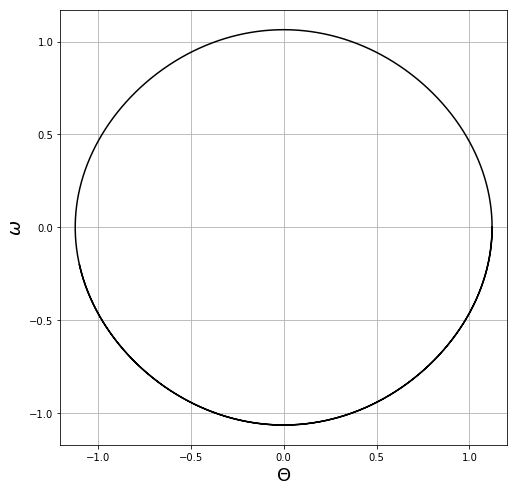

In [114]:
plt.figure(figsize=(8,8))
plt.plot(sol[:, 0], sol[:, 1], 'k')
plt.xlabel('$\Theta$',fontsize=18)
plt.ylabel('$\omega$',fontsize=18)
plt.axis('equal')
plt.grid()
plt.show()

 b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.

## 3.- Ecuación no lineal amortiguada no forzada.

 a) Utiliza un parametro de amortiguamiento de 0.02, la frecuencia natural unitaria y observa cómo el espacio fase se distorciona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado